In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv('../datasets/limpos/filmes_total.csv')
df.head(5)

year_ceremony                      category           name  \
0           2001         foreign language film         france   
1           2002    actor in a supporting role  jim broadbent   
2           2002     actress in a leading role     judi dench   
3           2002  actress in a supporting role   kate winslet   
4           2002         animated feature film    aron warner   

                  film  winner                title  \
0  the taste of others   False  the taste of others   
1                 iris    True                 iris   
2                 iris   False                 iris   
3                 iris   False                 iris   
4                shrek    True                shrek   

                                                crew  year  \
0  jeanpierre bacri, anne alvaro, alain chabat, b...  2000   
1  iris apfel, mickey boardman, linda fargo, tavi...  2014   
2  iris apfel, mickey boardman, linda fargo, tavi...  2014   
3  iris apfel, mickey boardman, linda fargo, tavi...  2014   
4  mike myers, eddie murphy, cameron diaz, john l...  2001   

                                     production_co  box_office_(gross_usa)  
0  le studio canal , les films a4, france 2 cinema                635300.0  
1                                              NaN               1300000.0  
2                                              NaN               1300000.0  
3                                              NaN               1300000.0  
4          dreamworks skg, pacific data images pdi             267700000.0

In [4]:
df[['film', 'category']].groupby(['category']).count()

film
category                                                
actor in a leading role                               31
actor in a supporting role                            41
actress in a leading role                             27
actress in a supporting role                          36
animated feature film                                114
art direction                                         21
award of commendation                                  1
best picture                                          90
cinematography                                        58
costume design                                        27
directing                                             59
documentary feature                                   76
film editing                                          54
foreign language film                                 27
international feature film                             4
makeup                                                12
makeup and hairstyling                                12
music original score                                  70
music original song                                   65
production design                                     36
short film live action                                 1
sound                                                  3
sound editing                                         81
sound mixing                                          63
visual effects                                        64
writing adapted screenplay                            41
writing original screenplay                           70
writing screenplay based on material previously...     2

In [5]:
films_nominations = df[['year', 'category', 'film']].sort_values(['year']).groupby(['year', 'film']).count()

films_nominations

category
year film                                
2000 the taste of others                1
2001 shrek                              4
     spirited away                      3
     winged migration                   1
2002 about a boy                        1
...                                   ...
2020 crip camp                          1
     onward                             4
     the trial of the chicago 7         6
     time                               1
     welcome to chechnya                1

[241 rows x 1 columns]

In [6]:
categories = ['actor in a leading role', 'actor in a supporting role', 'actress in a leading role', 'actress in a supporting role', ]

actors_prizes = df.query('category in @categories')

actors_prizes.describe()

year_ceremony         year  box_office_(gross_usa)
count     135.000000   135.000000            1.250000e+02
mean     2013.800000  2013.014815            7.846647e+07
std         5.036879     4.752038            6.520308e+07
min      2002.000000  2002.000000            1.083000e+05
25%      2010.000000  2010.000000            3.420000e+07
50%      2016.000000  2014.000000            5.410000e+07
75%      2018.000000  2017.000000            1.321000e+08
max      2021.000000  2020.000000            2.741000e+08

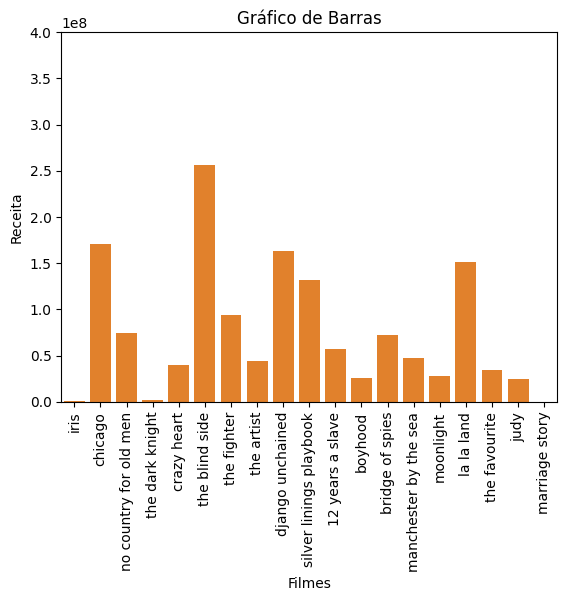

In [7]:
winner_box_office = actors_prizes.query('winner == True')

idade = df[['film', 'box_office_(gross_usa)']].groupby('film')
plt.bar(x=winner_box_office['film'],height=winner_box_office['box_office_(gross_usa)'])

sn.barplot(data=winner_box_office, x='film', y='box_office_(gross_usa)')
sn.color_palette("Blues", n_colors=len(winner_box_office))

# Rotacionando os rótulos do eixo x
plt.xticks(rotation=90)
plt.ylim(0, 400000000) 

# Configurando os eixos e título
plt.xlabel('Filmes')
plt.ylabel('Receita')
plt.title('Gráfico de Barras')

# Exibindo o gráfico
plt.show()

In [8]:
winner_box_office = actors_prizes.query('winner == False')

idade = df[['film', 'box_office_(gross_usa)']].groupby('film')
plt.bar(x=winner_box_office['film'],height=winner_box_office['box_office_(gross_usa)'])

sn.barplot(data=winner_box_office, x='film', y='box_office_(gross_usa)')
sn.color_palette("Blues", n_colors=len(winner_box_office))

# Rotacionando os rótulos do eixo x
plt.xticks(rotation=90)
plt.ylim(0, 400000000) 

# Configurando os eixos e título
plt.xlabel('Filmes')
plt.ylabel('Receita')
plt.title('Gráfico de Barras')

# Exibindo o gráfico
plt.show()

<Axes: title={'center': 'box_office_(gross_usa)'}, xlabel='winner'>

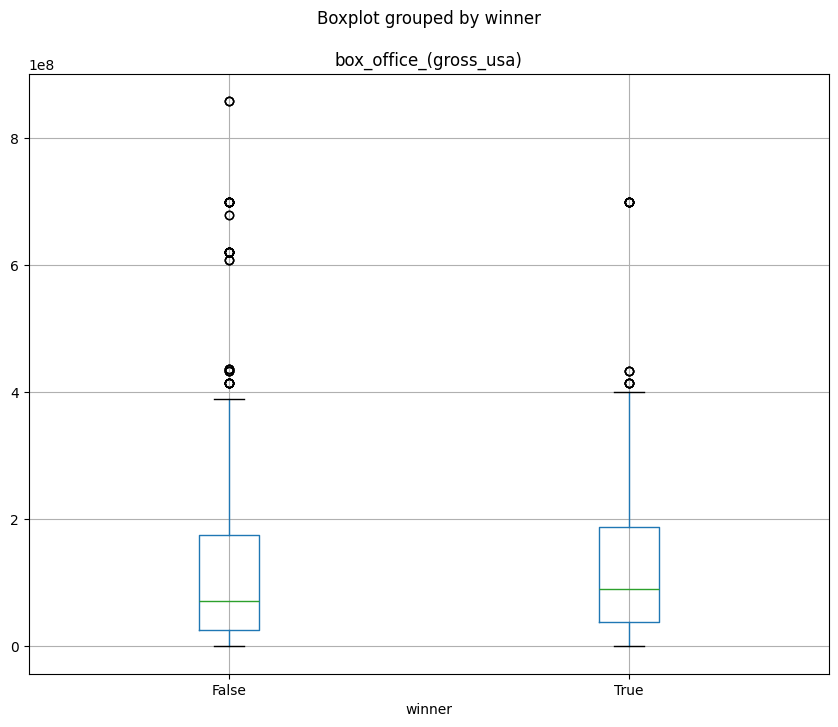

In [9]:
grouped_by_winner = df.groupby('winner')

df.boxplot(column='box_office_(gross_usa)', by='winner', figsize=[10,8])

# Analise qtd e faturamento por ano

In [10]:
df.boxplot(by='year', column='box_office_(gross_usa)', figsize=[10,8])

<Axes: title={'center': 'box_office_(gross_usa)'}, xlabel='year'>

<BarContainer object of 21 artists>

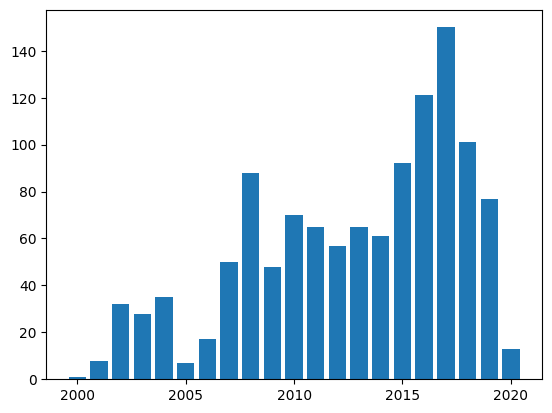

In [11]:
group = df.groupby('year')['title'].count().reset_index(name='qtd_filmes')
plt.bar(x=group['year'], height=group['qtd_filmes'])